In [41]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imbalanced-learn's Pipeline for resampling
import joblib
import pickle

In [42]:
# Load data
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\final_project\car_insurance\Sourse\cleaned_data.csv")
# Drop 'policy_id' column
data.drop(['engine_type','area_cluster', 'population_density', 'make', 'model'], axis=1, inplace=True)

In [43]:
# Split data into features and target variable
X = data.drop('is_claim', axis=1)
y = data['is_claim']

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(["float64", "int64"]).columns
categorical_columns = X.select_dtypes(["object"]).columns

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)
X = preprocessor.fit_transform(X)

In [44]:
# Handle class imbalance using SMOTEENN
smt = SMOTEENN()
X, y = smt.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y)))


Resampled dataset shape Counter({1: 39932, 0: 35472})


In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
# Scale features using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [47]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [48]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store results
    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'accuracy_score': accuracy_score(y_test, y_pred)
    }

# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(metrics['classification_report'])
    print(f"Accuracy Score: {metrics['accuracy_score']}\n")


Model: Random Forest
Confusion Matrix:
[[6826  233]
 [ 227 7795]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7059
           1       0.97      0.97      0.97      8022

    accuracy                           0.97     15081
   macro avg       0.97      0.97      0.97     15081
weighted avg       0.97      0.97      0.97     15081

Accuracy Score: 0.9694980438962933

Model: XGBoost
Confusion Matrix:
[[6720  339]
 [ 975 7047]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7059
           1       0.95      0.88      0.91      8022

    accuracy                           0.91     15081
   macro avg       0.91      0.92      0.91     15081
weighted avg       0.92      0.91      0.91     15081

Accuracy Score: 0.9128704993037597

Model: Decision Tree
Confusion Matrix:
[[6527  532]
 [ 434 7588]]
Classification Report:
             

In [49]:
# Ensure 'results' is correctly populated with model names and their accuracy scores
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Choose the best model based on accuracy scores
best_model_name = max(results, key=lambda k: results[k])
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")



Random Forest Accuracy: 0.9690
XGBoost Accuracy: 0.9129
Decision Tree Accuracy: 0.9367
KNN Accuracy: 0.9506
Gradient Boosting Accuracy: 0.7892
Best Model: Random Forest with Accuracy: 0.9690


# Best Model Is Random Forest

In [50]:
model = RandomForestClassifier(bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7059
           1       0.98      0.97      0.97      8022

    accuracy                           0.97     15081
   macro avg       0.97      0.97      0.97     15081
weighted avg       0.97      0.97      0.97     15081

0.971222067502155


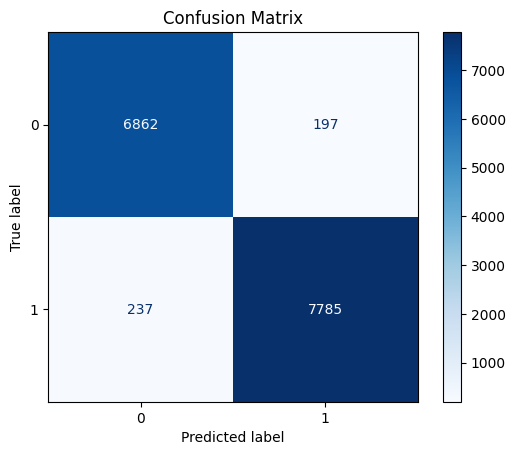

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [53]:
# # Save the preprocessor and model to a file
# joblib.dump(model,'model.pkl')
# joblib.dump(preprocessor, 'preprocessor.pkl')
